# Toward predicting the used car price
## Goal: predicting car price

##### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Step 1: Getting the Data

In [2]:
data = pd.read_csv("Used Cars Price.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Step 2: Analyzing Data

In [3]:
data.shape

(4345, 9)

In [4]:
data.info()
### 'Price' and 'EngineV' have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


##### Exploring the descriptive statistics of the variables

In [5]:
# include='all' shows all numerical and string values

data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Step 3: Preprocessing (prepare data)

#### 3.1 To predict the label, we should get correlation 'Label' column with other columns.

In [6]:
# Standard correlation coefficient [-1, 1]
# if correlation around 0, it's not important and dose't get any informations.
# in this case just get linear correlation

corr_matrix = data.corr(numeric_only=True)
corr_matrix['Price'].sort_values(ascending = False)

Price      1.000000
Year       0.487031
EngineV    0.058664
Mileage   -0.464795
Name: Price, dtype: float64

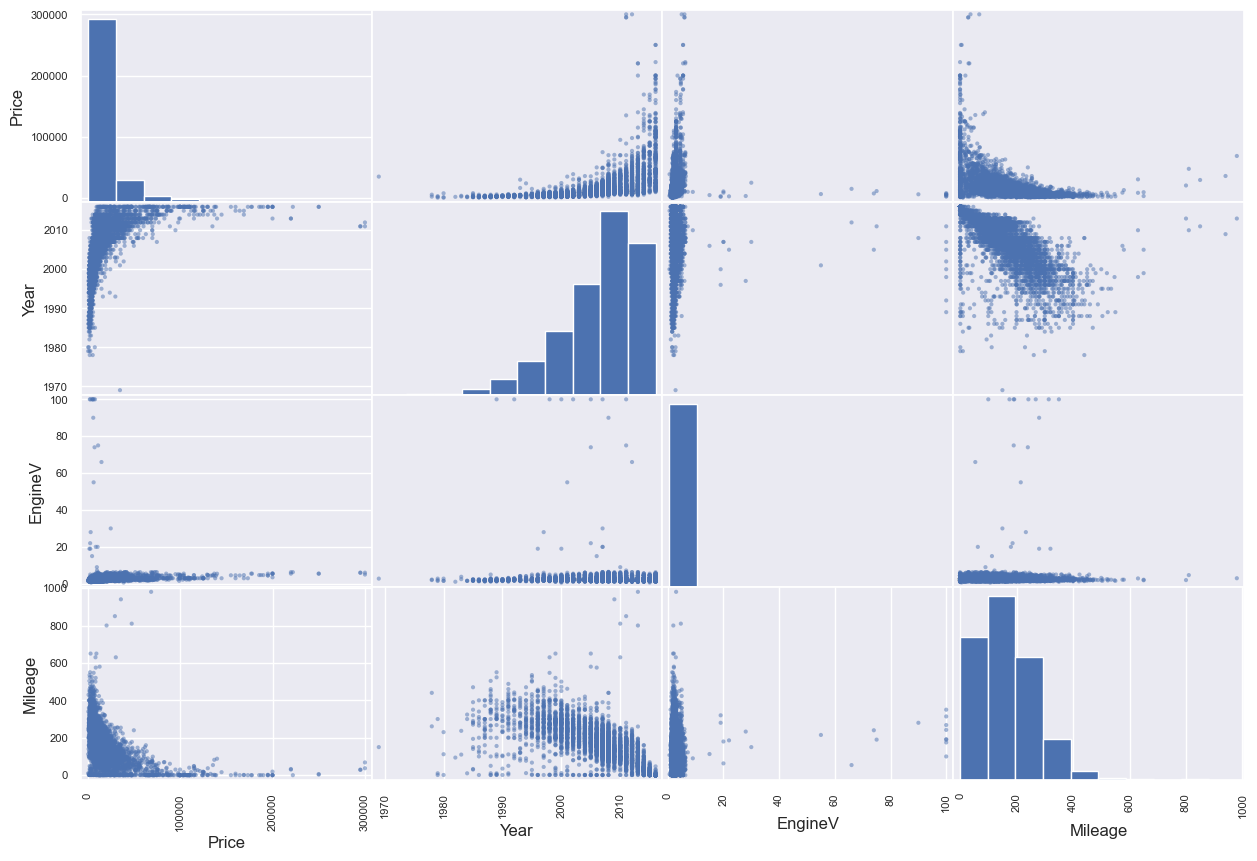

In [7]:
# the most correlation features
features = ['Price','Year','EngineV','Mileage']
scatter_matrix(data[features], figsize = (15,10))
plt.show()

#### 3.2 Dealing with outliers

##### Exploring the PDFs (Probability Density Function)

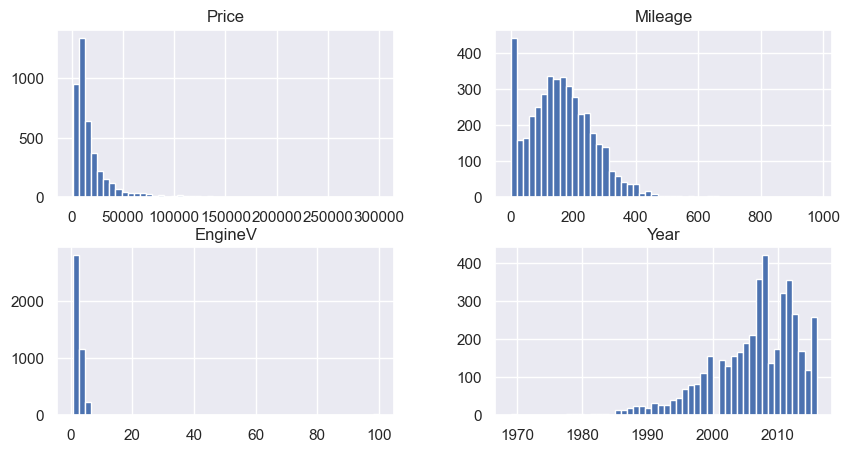

In [8]:
data.hist(bins=50, figsize = (10, 5))
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

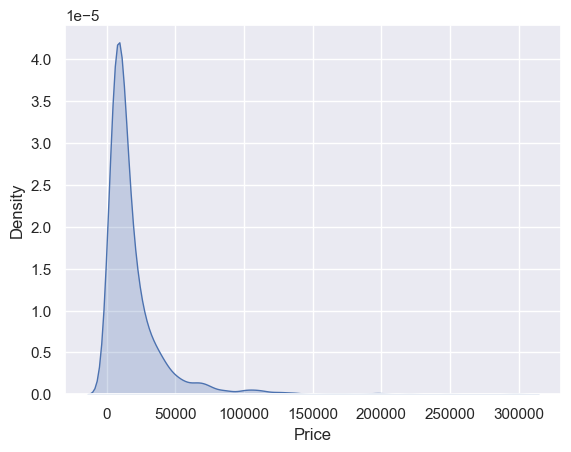

In [9]:
# 1. Price
sns.kdeplot(data['Price'], fill = True, legend = False)
### 20000$ is the most price

In [10]:
q = data['Price'].quantile(0.99)   # 99% top of data
data_1 = data[data['Price'] < q]
data_1.describe(include='all')

### ekhtelaf beyne max va mean kam shod.
### be tozie normal kami nazdik shod.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4131,4131.000000,4131,4131.000000,3983.000000,4131,4131,4131.000000,4131
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,908,NaN,1597,NaN,NaN,1895,3737,NaN,193
mean,NaN,17736.684812,NaN,165.622125,2.743204,NaN,NaN,2006.281288,NaN
std,NaN,18862.421137,NaN,104.213992,4.956550,NaN,NaN,6.663535,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6900.000000,NaN,93.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


<Axes: xlabel='Price', ylabel='Density'>

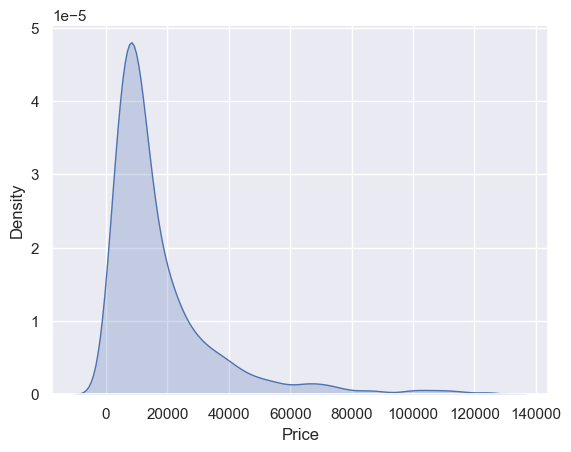

In [11]:
sns.kdeplot(data_1['Price'], fill = True, legend = False)

<Axes: xlabel='Mileage', ylabel='Density'>

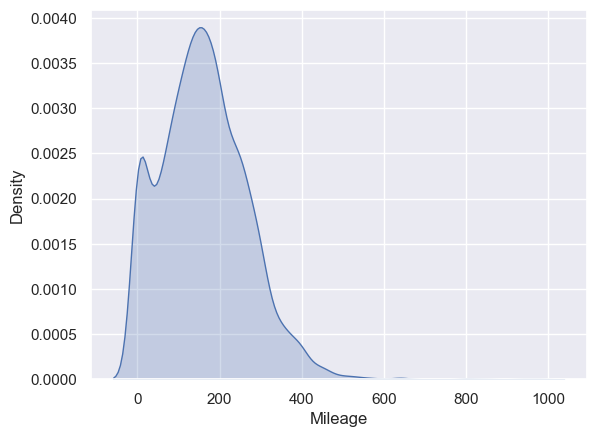

In [12]:
# 2. Mileage
sns.kdeplot(data['Mileage'], fill = True)

<Axes: xlabel='Mileage', ylabel='Density'>

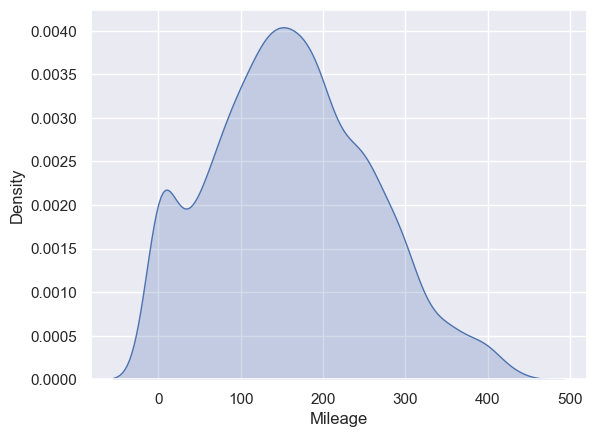

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.kdeplot(data_2['Mileage'], fill=True, legend=False)

<Axes: xlabel='EngineV', ylabel='Density'>

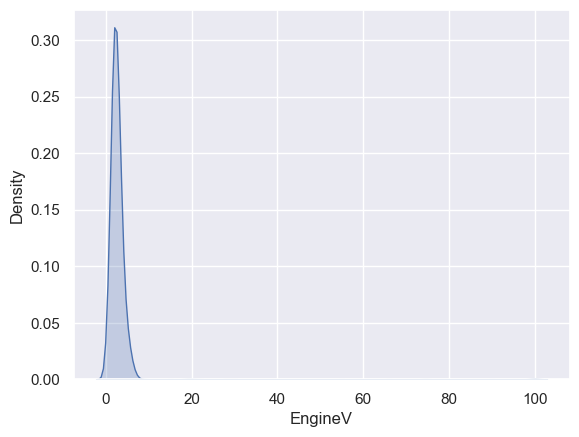

In [14]:
# 3. EngineV
sns.kdeplot(data['EngineV'], fill=True)

<Axes: xlabel='EngineV', ylabel='Density'>

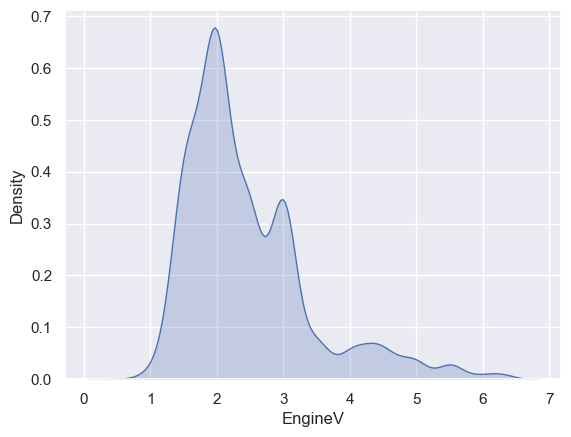

In [15]:
# with search in google, we understand car's EngineV usually uder 6.5 
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.kdeplot(data_3['EngineV'], fill=True)

<Axes: xlabel='Year', ylabel='Density'>

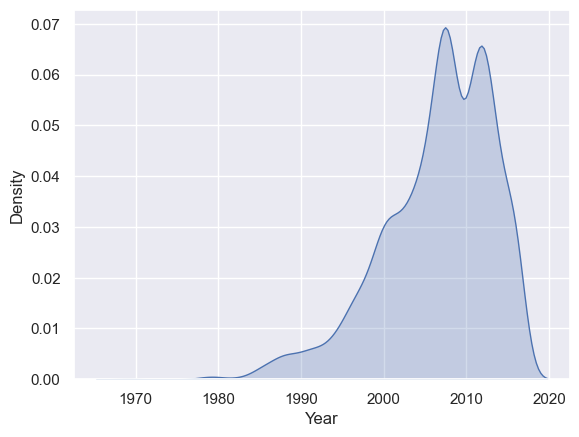

In [16]:
# 4. Year
sns.kdeplot(data['Year'], fill=True)

<Axes: xlabel='Year', ylabel='Density'>

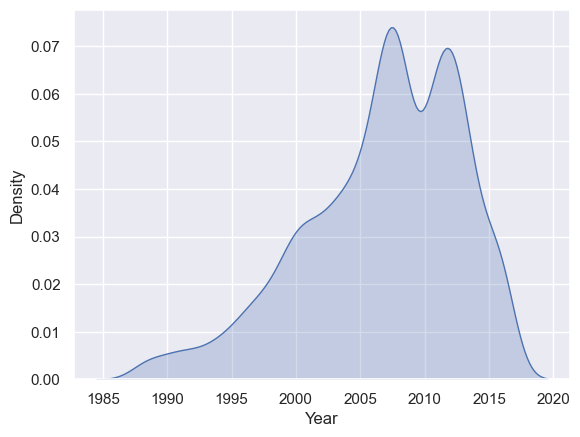

In [17]:
# In 'year' column, cars with a higher year are better.
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
sns.kdeplot(data_4['Year'], fill=True)

In [18]:
# final data without outlier
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [19]:
data_cleaned_outlier = data_4.reset_index(drop=True)
data_cleaned_outlier

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [20]:
data_cleaned_outlier.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18162.616527,NaN,160.655288,2.449664,NaN,NaN,2006.704939,NaN
std,NaN,19003.107456,NaN,95.703315,0.948508,NaN,NaN,6.104037,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21650.000000,NaN,225.500000,3.000000,NaN,NaN,2012.000000,NaN


#### 3.3 Dealing with missing values

In [21]:
# 1. Numerical ===>>> missing values (1.drop_rows, 2.drop_columns, 3.replace)
# 2. Categorical and text data ===>>> LabelEncoder, OneHotEncoder
# 3. Numerical data ===>>> Feature sacling (1.Standardization : calculate variance and good for outlier
#                                           2.Normalization [0, 1] : It dosen't good for outlier and good for neural network)
# 4. Numeriacal ===>>> Custom Transforms (add new feature form other columns or changes data)

In [22]:
data_cleaned_outlier.isnull().sum()
### we don't have missing values.

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 3.4 Feature Scaling

In [23]:
numerical_data = data_cleaned_outlier[['Price','Mileage','EngineV','Year']]
numerical_data

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
1,7900.0,427,2.9,1999
2,13300.0,358,5.0,2003
3,23000.0,240,4.2,2007
4,18300.0,120,2.0,2011
...,...,...,...,...
3862,11500.0,163,2.5,2008
3863,17900.0,35,1.6,2014
3864,125000.0,9,3.0,2014
3865,6500.0,1,3.5,1999


In [24]:
############################################################ feature scaling ###################################################################
# 1.Standardization : calculate variance and good for outlier
# 2.Normalization [0, 1] : It dosen't good for outlier and good for neural network
################################################################################################################################################

from sklearn.preprocessing import StandardScaler

feature_scale = StandardScaler()
data_num_scaled = pd.DataFrame(feature_scale.fit_transform(numerical_data.values), columns= numerical_data.columns)
data_num_scaled.head()

,Price,Mileage,EngineV,Year
0,-0.734849,1.215838,-0.474136,-2.573210
1,-0.540119,2.783385,0.474845,-1.262433
2,-0.255918,2.062313,2.689136,-0.607044
3,0.254590,0.829177,1.845596,0.048345
4,0.007230,-0.424860,-0.474136,0.703734


#### 3.5 OneHotEncoder

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Create the encoder and fit_transform the data
encoder_1hot = OneHotEncoder(sparse_output=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(data_cleaned_outlier[['Brand',"Body","Engine Type","Registration"]])

# Step 2: Create a DataFrame with the encoded data and set appropriate column names
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names_out()
data_cat_1hot.head()


,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
data_cat_1hot.shape

(3867, 19)

In [27]:
# numerical attributes: 'Price','Mileage','EngineV','Year'
# categorical attributes: 'Brand',"Body","Engine Type","Registration" ===> 19 columns in OneHotEncoder
# remove 'Model' atributte, because it have lots of unique values. 

final = pd.concat([data_num_scaled, data_cat_1hot], axis=1)
final.head()

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,-0.734849,1.215838,-0.474136,-2.573210,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.540119,2.783385,0.474845,-1.262433,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.255918,2.062313,2.689136,-0.607044,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.254590,0.829177,1.845596,0.048345,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.007230,-0.424860,-0.474136,0.703734,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [28]:
final.shape

(3867, 23)

In [29]:
# final.info()

In [30]:
# This cell get similar output of above, but it's pipline from.

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import FeatureUnion
    
# # # select numerical columns or text columns
# class DataFrameSelector(BaseEstimator, TransformerMixin):           
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit (self, x, y = None):
#         return self
#     def transform(self, x):
#         return x[self.attribute_names].values

# # outliers
# class remove_outliers(BaseEstimator, TransformerMixin):
#     def fit (self, x = None):
#         return self

#     def transform (self, x = None):
#         q_price = df1['Price'].quantile(0.99)   # 99% top of data
#         data_1 = df1[df1['Price'] < q_price]

#         q_Mileage = data_1['Mileage'].quantile(0.99)
#         data_2 = data_1[data_1['Mileage'] < q_Mileage]
        
#         data_3 = data_2[data_2['EngineV'] < 6.5]

#         q_Year = data_3['Year'].quantile(0.01)
#         data_4 = data_3[data_3['Year'] > q_Year]

#         data_cleaned_outlier = data_4.reset_index(drop=True)

#         return data_cleaned_outlier
    

# df = train_set.copy()
# df1 = train_set.copy()
# df_label = df['Price'].copy()
# df = df.drop(["Price","Model"], axis=1)

# df_num = df.drop(["Body","Engine Type","Registration",'Brand'], axis=1)                     # Numerical dataframe 
# num_attrs = list(df_num)                                                                    # list of Numerical attributes
# cat_attrs = ['Brand',"Body","Engine Type","Registration"]                                   # Categorical attributes

# # Numerical attributes
# num_pipline = Pipeline([
#     ('selector', DataFrameSelector(num_attrs)),
#     ('std_scaler', StandardScaler()),
#     # ('ouliers', remove_outliers())
# ])

# # Categorical attributes
# cat_attrs = ['Brand',"Body","Engine Type","Registration"] 
# cat_pipline = Pipeline([
#     ('selector', DataFrameSelector(cat_attrs)),
#     ('one_hot_encoder', OneHotEncoder(sparse_output=False))
# ])

# Numerical pipeline and Categorical Pipeline
# Combine Pipeline
# full_pipline = FeatureUnion(transformer_list= [
#     ('num_pipline', num_pipline),
#     ('cat_pipline', cat_pipline),
# ])


# # # This is pipeline, do for new data just run this code and doesn't need run lots of code
# df_prepared = full_pipline.fit_transform(df)

# # # create dataframe
# car_prepared_df = pd.DataFrame(df_prepared, columns= ['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
#                                                      'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
#                                                      'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
#                                                      'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
#                                                      'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
#                                                      'Engine Type_Petrol', 'Registration_no', 'Registration_yes'])
# car_prepared_df.head()


In [31]:
#car_prepared_df.shape

## Step 4: ML Model

In [32]:
final_label = final['Price']                        # model should predict this label
final_noLabel = final.drop('Price', axis = 1)       # we should remove label from train data, because model should predict it.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(final_noLabel, final_label, test_size=0.2, random_state=42)

In [34]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_train)

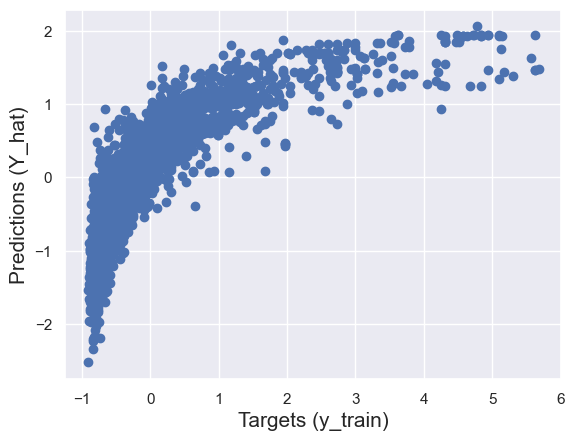

In [35]:
plt.scatter(y_train, y_hat)

plt.xlabel("Targets (y_train)", size = 15)
plt.ylabel("Predictions (Y_hat)", size = 15)

plt.show()

### In this fig shows that less price has a good predictions, but more price not.



Text(0.5, 1.0, 'Rediduals PDF')

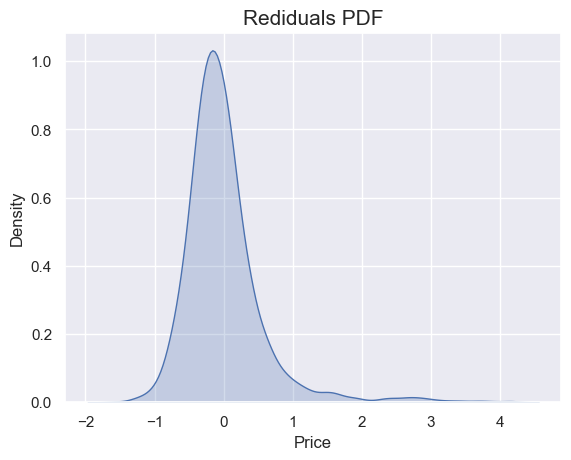

In [36]:
# A Rediduals is the difference between the observed value and the predicted value (by the model).

sns.kdeplot(y_train - y_hat, fill = True)
plt.title("Rediduals PDF", size=15)

### It's not normal and has anomali.

In [37]:
reg.score(x_train, y_train)

## 62% good and 38% bad.

0.6299764664011183

In [38]:
reg.intercept_

2411950895794.975

In [39]:
reg.coef_

array([-3.21923882e-01,  2.29752235e-01,  2.98417050e-01, -1.15805547e+11,
       -1.15805547e+11, -1.15805547e+11, -1.15805547e+11, -1.15805547e+11,
       -1.15805547e+11, -1.15805547e+11,  2.63522321e+11,  2.63522321e+11,
        2.63522321e+11,  2.63522321e+11,  2.63522321e+11,  2.63522321e+11,
       -2.40409657e+12, -2.40409657e+12, -2.40409657e+12, -2.40409657e+12,
       -1.55571098e+11, -1.55571098e+11])

In [51]:
reg_summary = pd.DataFrame(final_noLabel.columns.values, columns=['Features'])
reg_summary ['Weights'] = reg.coef_
pd.set_option('display.float_format', lambda x: '%.2f' % x)
reg_summary 

,Features,Weights
0,Mileage,-0.32
1,EngineV,0.23
2,Year,0.30
3,Brand_Audi,-115805547377.98
4,Brand_BMW,-115805547377.87
5,Brand_Mercedes-Benz,-115805547377.88
6,Brand_Mitsubishi,-115805547378.56
7,Brand_Renault,-115805547378.60
8,Brand_Toyota,-115805547378.32
9,Brand_Volkswagen,-115805547378.29


### Our Model
y = -0.32 * Mileage + 0.23 * EngineV + 0.30	 * Year + ... + -155571097887.16 * Registration_yes	

## Step 5: Test Model

In [41]:
y_hat_test = reg.predict(x_test)

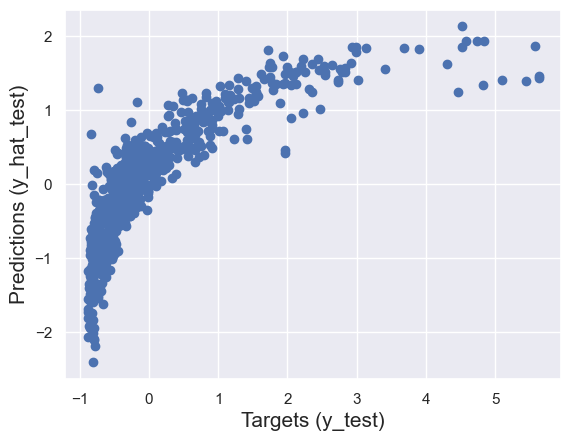

In [42]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size = 15)
plt.ylabel('Predictions (y_hat_test)', size = 15)

plt.show()

In [43]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_performance.head()

,Prediction
0,1.49
1,1.41
2,0.32
3,3.09
4,6.26


In [44]:
df_performance['Target'] = np.exp(y_test)
df_performance.head()

,Prediction,Target
0,1.49,0.48
1,1.41,NaN
2,0.32,NaN
3,3.09,NaN
4,6.26,NaN


In [45]:
y_test.head()

2174   -0.09
1420    0.24
2478   -0.71
1584    1.51
952     3.90
Name: Price, dtype: float64

In [46]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   -0.09
1    0.24
2   -0.71
3    1.51
4    3.90
Name: Price, dtype: float64

In [47]:
df_performance["Target"] = np.exp(y_test)
df_performance

,Prediction,Target
0,1.49,0.91
1,1.41,1.28
2,0.32,0.49
3,3.09,4.54
4,6.26,49.29
...,...,...
769,0.66,0.62
770,2.08,1.91
771,0.78,0.64
772,3.47,4.71


In [48]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

df_performance['Percent Error'] = np.absolute(df_performance['Residual'] / df_performance['Target'] * 100)

df_performance

,Prediction,Target,Residual,Percent Error
0,1.49,0.91,-0.58,63.27
1,1.41,1.28,-0.13,10.43
2,0.32,0.49,0.17,34.10
3,3.09,4.54,1.45,31.92
4,6.26,49.29,43.03,87.30
...,...,...,...,...
769,0.66,0.62,-0.04,6.74
770,2.08,1.91,-0.17,8.77
771,0.78,0.64,-0.14,21.58
772,3.47,4.71,1.24,26.26


In [49]:
df_performance.describe()

,Prediction,Target,Residual,Percent Error
count,774.00,774.00,774.00,774.00
mean,1.42,4.33,2.91,38.29
std,1.30,22.27,21.71,41.04
min,0.09,0.41,-3.23,0.15
25%,0.61,0.56,-0.33,12.70
50%,0.96,0.72,-0.07,28.85
75%,1.67,1.26,0.13,52.71
max,8.46,276.67,272.43,677.30


In [50]:
# pd.options.display.max_rows = 999      # shows all of rows
df_performance.sort_values(by = ['Percent Error'], inplace=True)
np.round(df_performance, 3)      # round the number in 3 decimals

,Prediction,Target,Residual,Percent Error
362,4.06,4.06,0.01,0.15
762,0.99,1.00,0.00,0.16
678,2.79,2.80,0.01,0.19
49,1.64,1.64,-0.00,0.22
294,0.59,0.59,0.00,0.25
...,...,...,...,...
585,1.21,0.45,-0.76,167.81
614,2.33,0.78,-1.56,201.30
651,3.04,0.85,-2.19,258.69
511,1.98,0.44,-1.54,354.11
